# **German Credit Risk Dataset Analysis**


The goal is to predict if this loan credit would be a risk to the bank or not?

In simple terms, if the loan amount is given to the applicant, will they pay back or become a defaulter?

Since there are many applications which needs to be processed everyday, it will be helpful if there was a predictive model in place which can assist the executives to do their job by giving them a heads up about approval or rejection of a new loan application.

# Import Libraries

In [23]:
# install dtreeplt
!pip install dtreeplt

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

In [25]:
#Reading the data into python
df=pd.read_csv('https://drive.google.com/uc?id=1jEoY5yZNEi9Eoq23BK8Gox-ihTyGONdG&export=download')

In [26]:
df.head()

,GoodCredit,checkingstatus,duration,history,purpose,amount,savings,employ,installment,status,others,residence,property,age,otherplans,housing,cards,job,liable,tele,foreign
0,0,A11,6,A34,A43,1169,A65,A75,4,A93,A101,4,A121,67,A143,A152,2,A173,1,A192,A201
1,1,A12,48,A32,A43,5951,A61,A73,2,A92,A101,2,A121,22,A143,A152,1,A173,1,A191,A201
2,0,A14,12,A34,A46,2096,A61,A74,2,A93,A101,3,A121,49,A143,A152,1,A172,2,A191,A201
3,0,A11,42,A32,A42,7882,A61,A74,2,A93,A103,4,A122,45,A143,A153,1,A173,2,A191,A201
4,1,A11,24,A33,A40,4870,A61,A73,3,A93,A101,4,A124,53,A143,A153,2,A173,2,A191,A201


# Data description(Data Dictionary)


The business meaning of each column in the data 

* `GoodCredit`: Whether the issued loan was a good decision or bad
* `checkingstatus`: Status of existing checking account.
* `duration`: Duration of loan in months
* `history`: Credit history of the applicant
* `purpose`: Purpose for the loan
* `amount`: Credit amount
* `savings`: Savings account/bonds
* `employ`: Present employment since
* `installment`: Installment rate in percentage of disposable income
* `status`: Personal status and sex
* `others`: Other debtors / guarantors for the applicant
* `residence`: Present residence since
* `property`: Property type of applicant
* `age`: Age in years
* `otherplans`: Other installment plans
* `housing`: Housing
* `cards`: Number of existing credits at this bank
* `job`: Job
* `liable`: Number of people being liable to provide maintenance for
* `tele`: Is the Telephone registered or not
* `foreign`: Is the applicant a foreign worker

# Data Exploration - Aimed at understanding the overall data

In [27]:
#Number of rows and columns
df.shape

(1000, 21)

In [28]:
##Descriptive statistics of the data
df.describe(include='all')

,GoodCredit,checkingstatus,duration,history,purpose,amount,savings,employ,installment,status,others,residence,property,age,otherplans,housing,cards,job,liable,tele,foreign
count,1000.000000,1000,1000.000000,1000,1000,1000.000000,1000,1000,1000.000000,1000,1000,1000.000000,1000,1000.000000,1000,1000,1000.000000,1000,1000.000000,1000,1000
unique,NaN,4,NaN,5,10,NaN,5,5,NaN,4,3,NaN,4,NaN,3,3,NaN,4,NaN,2,2
top,NaN,A14,NaN,A32,A43,NaN,A61,A73,NaN,A93,A101,NaN,A123,NaN,A143,A152,NaN,A173,NaN,A191,A201
freq,NaN,394,NaN,530,280,NaN,603,339,NaN,548,907,NaN,332,NaN,814,713,NaN,630,NaN,596,963
mean,0.300000,NaN,20.903000,NaN,NaN,3271.258000,NaN,NaN,2.973000,NaN,NaN,2.845000,NaN,35.546000,NaN,NaN,1.407000,NaN,1.155000,NaN,NaN
std,0.458487,NaN,12.058814,NaN,NaN,2822.736876,NaN,NaN,1.118715,NaN,NaN,1.103718,NaN,11.375469,NaN,NaN,0.577654,NaN,0.362086,NaN,NaN
min,0.000000,NaN,4.000000,NaN,NaN,250.000000,NaN,NaN,1.000000,NaN,NaN,1.000000,NaN,19.000000,NaN,NaN,1.000000,NaN,1.000000,NaN,NaN
25%,0.000000,NaN,12.000000,NaN,NaN,1365.500000,NaN,NaN,2.000000,NaN,NaN,2.000000,NaN,27.000000,NaN,NaN,1.000000,NaN,1.000000,NaN,NaN
50%,0.000000,NaN,18.000000,NaN,NaN,2319.500000,NaN,NaN,3.000000,NaN,NaN,3.000000,NaN,33.000000,NaN,NaN,1.000000,NaN,1.000000,NaN,NaN
75%,1.000000,NaN,24.000000,NaN,NaN,3972.250000,NaN,NaN,4.000000,NaN,NaN,4.000000,NaN,42.000000,NaN,NaN,2.000000,NaN,1.000000,NaN,NaN


In [29]:
#Summarized information of data- Data types, Missing values based on number of non-null values Vs total rows etc.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   GoodCredit      1000 non-null   int64 
 1   checkingstatus  1000 non-null   object
 2   duration        1000 non-null   int64 
 3   history         1000 non-null   object
 4   purpose         1000 non-null   object
 5   amount          1000 non-null   int64 
 6   savings         1000 non-null   object
 7   employ          1000 non-null   object
 8   installment     1000 non-null   int64 
 9   status          1000 non-null   object
 10  others          1000 non-null   object
 11  residence       1000 non-null   int64 
 12  property        1000 non-null   object
 13  age             1000 non-null   int64 
 14  otherplans      1000 non-null   object
 15  housing         1000 non-null   object
 16  cards           1000 non-null   int64 
 17  job             1000 non-null   object
 18  liable   

In [30]:
#Number of Unique variable in each column
df.nunique()

GoodCredit          2
checkingstatus      4
duration           33
history             5
purpose            10
amount            921
savings             5
employ              5
installment         4
status              4
others              3
residence           4
property            4
age                53
otherplans          3
housing             3
cards               4
job                 4
liable              2
tele                2
foreign             2
dtype: int64

In [31]:
#Any Null-Value
df.isnull().sum()

GoodCredit        0
checkingstatus    0
duration          0
history           0
purpose           0
amount            0
savings           0
employ            0
installment       0
status            0
others            0
residence         0
property          0
age               0
otherplans        0
housing           0
cards             0
job               0
liable            0
tele              0
foreign           0
dtype: int64

In [32]:
# Removing duplicate rows if any
df=df.drop_duplicates()

In [33]:
#checking shape of Data after removing Duplicates
df.shape

(1000, 21)

# Basic Data Exploration Results:

Target Variable: **GoodCredit**

**Predictors**: *duration, history, purpose, amount, savings*, etc.

* GoodCredit = 1 means the loan was a good decision.
* GoodCredit = 0 means the loan was a bad decision.

**Determining the type of Machine Learning -**

Based on the problem statement I can understand that we need to create a supervised ML classification model, as the target variable is categorical.

# -Looking at the distribution of Target variable 

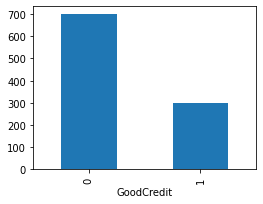

In [34]:
# Creating Bar chart as the Target variable is Categorical
GroupedData=df.groupby('GoodCredit').size()
GroupedData.plot(kind='bar', figsize=(4,3))

The data distribution of the target variable is satisfactory to proceed further. There are sufficient number of rows for each category to learn from.

# Visual Exploratory Data Analysis


1. **Categorical variales**: `'checkingstatus', 'history', 'purpose','savings','employ', 'installment', 'status', 'others','residence', 'property', 'otherplans', 'housing', 'cards', 'job', 'liable', 'tele', 'foreign'`


2. **Continuous variables**: `'amount', 'age', 'duration'`.

# Plotting bar charts for categorical variable

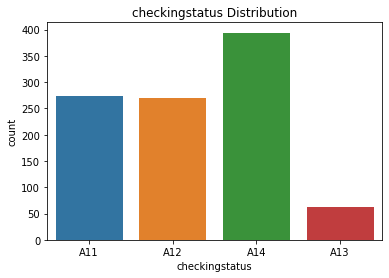

In [35]:
plt.figsize = (20,20)
sns.countplot(x = df['checkingstatus'])
plt.title('checkingstatus Distribution')
plt.show()

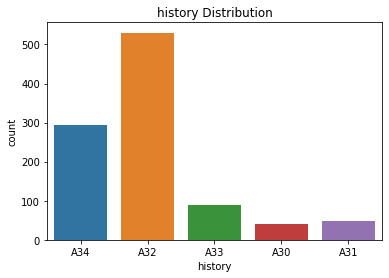

In [36]:
plt.figsize = (20,20)
sns.countplot(x = df['history'])
plt.title('history Distribution')
plt.show()

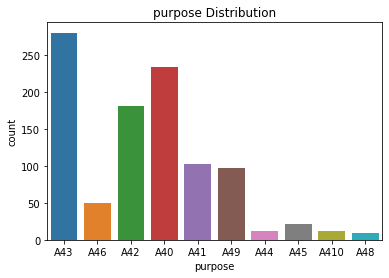

In [37]:
plt.figsize = (20,20)
sns.countplot(x = df['purpose'])
plt.title('purpose Distribution')
plt.show()

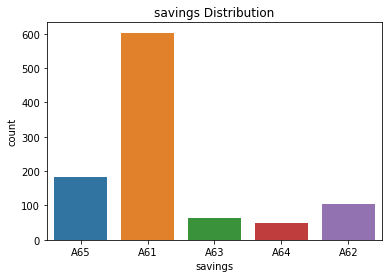

In [38]:
plt.figsize = (20,20)
sns.countplot(x = df['savings'])
plt.title('savings Distribution')
plt.show()

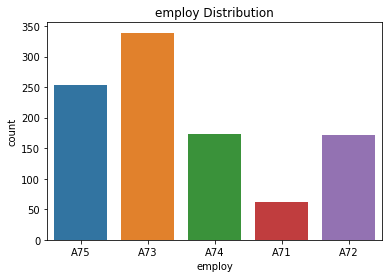

In [39]:
plt.figsize = (20,20)
sns.countplot(x = df['employ'])
plt.title('employ Distribution')
plt.show()

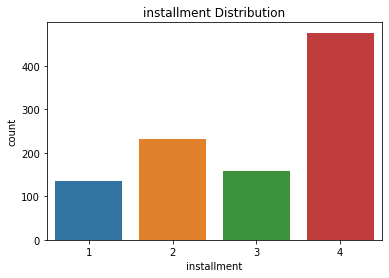

In [40]:
plt.figsize = (20,20)
sns.countplot(x = df['installment'])
plt.title('installment Distribution')
plt.show()

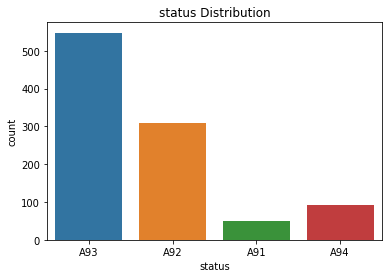

In [41]:
plt.figsize = (20,20)
sns.countplot(x = df['status'])
plt.title('status Distribution')
plt.show()

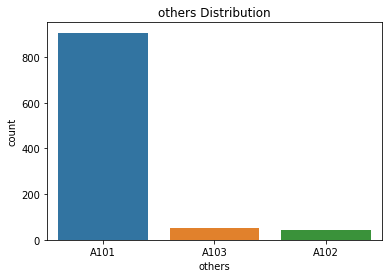

In [42]:
plt.figsize = (20,20)
sns.countplot(x = df['others'])
plt.title('others Distribution')
plt.show()

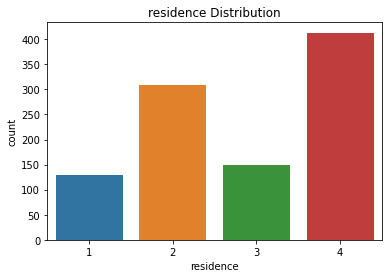

In [43]:
plt.figsize = (20,20)
sns.countplot(x = df['residence'])
plt.title('residence Distribution')
plt.show()

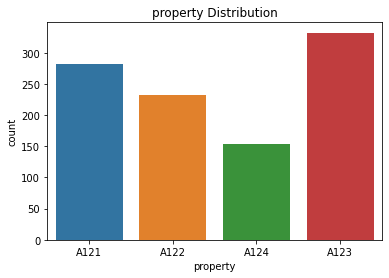

In [44]:
plt.figsize = (20,20)
sns.countplot(x = df['property'])
plt.title('property Distribution')
plt.show()

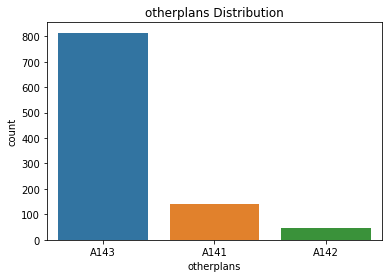

In [45]:
 plt.figsize = (20,20)
sns.countplot(x = df['otherplans'])
plt.title('otherplans Distribution')
plt.show()

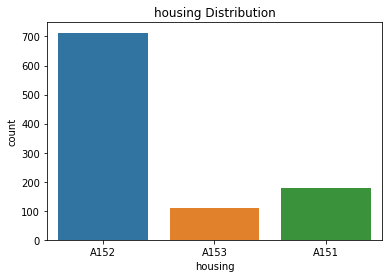

In [46]:
plt.figsize = (20,20)
sns.countplot(x = df['housing'])
plt.title('housing Distribution')
plt.show()

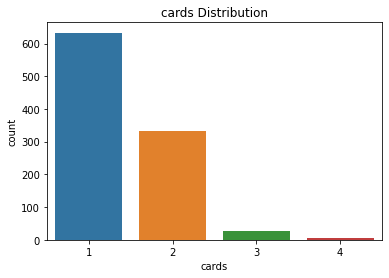

In [47]:
plt.figsize = (20,20)
sns.countplot(x = df['cards'])
plt.title('cards Distribution')
plt.show()

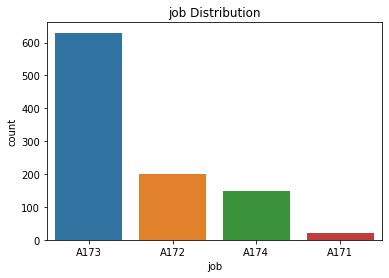

In [48]:
plt.figsize = (20,20)
sns.countplot(x = df['job'])
plt.title('job Distribution')
plt.show()

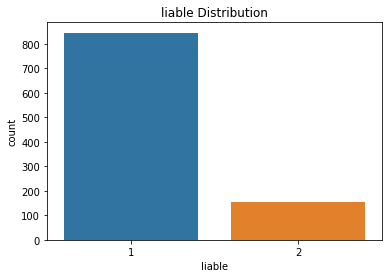

In [49]:
plt.figsize = (20,20)
sns.countplot(x = df['liable'])
plt.title('liable Distribution')
plt.show()

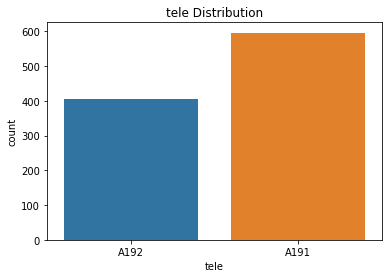

In [50]:
plt.figsize = (20,20)
sns.countplot(x = df['tele'])
plt.title('tele Distribution')
plt.show()

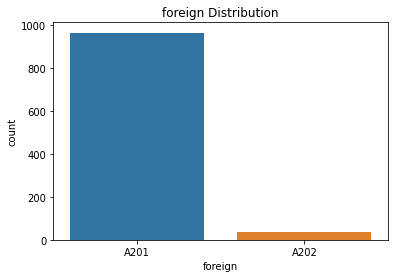

In [51]:
plt.figsize = (20,20)
sns.countplot(x = df['foreign'])
plt.title('foreign Distribution')
plt.show()

# Bar Charts Interpretation
---

These bar charts represent the frequencies of each category in the Y-axis and the category names in the X-axis.

The ideal bar chart is where each category has comparable frequency. Hence, there are enough rows for each category in the data for the ML algorithm to learn.

If there is a column which shows too skewed distribution where there is only one dominant bar and the other categories are present in very low numbers. These kind of columns may not be very helpful in machine learning. We will confirm this in the correlation analysis section and take a final call to select or reject the column.


# Plotting histograms for continuous variables



array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fb2c797c710>,
      dtype=object)

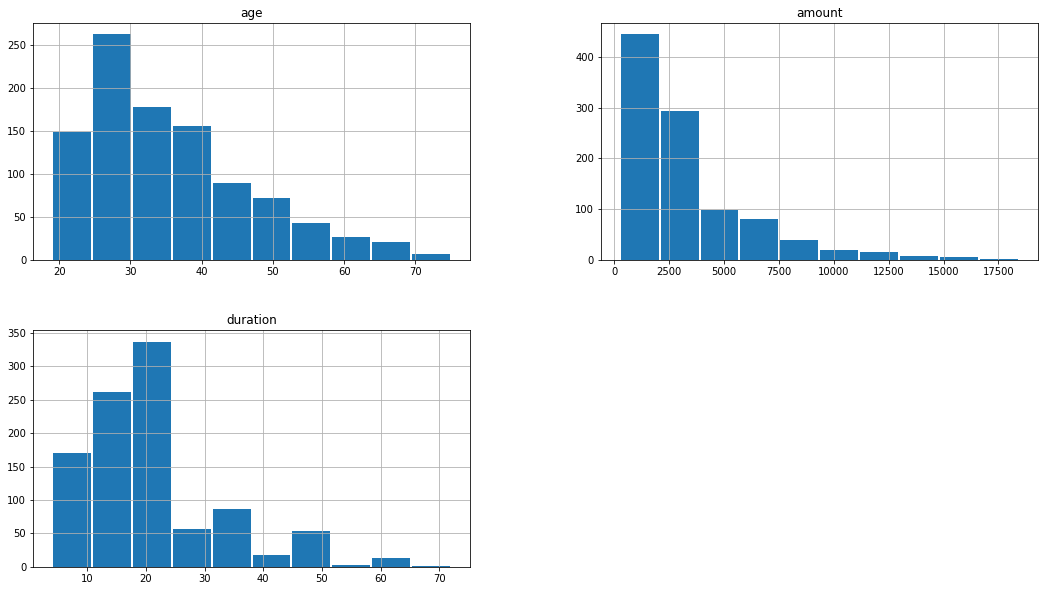

In [52]:
df.hist(['age', 'amount','duration'], figsize=(18,10), rwidth=0.95)

# Histogram Interpretation:
Histograms shows us the data distribution for a single continuous variable.

The X-axis shows the range of values and Y-axis represent the number of values in that range. 


# Missing values treatment

In [53]:
df.isnull().sum()

GoodCredit        0
checkingstatus    0
duration          0
history           0
purpose           0
amount            0
savings           0
employ            0
installment       0
status            0
others            0
residence         0
property          0
age               0
otherplans        0
housing           0
cards             0
job               0
liable            0
tele              0
foreign           0
dtype: int64

We see that we have no `null` values so no treatment is needed

# Feature Selection:
---

Now its time to finally choose the best columns(Features) which are correlated to the Target variable. 

We will do this by visualizing the relation between the Target variable and each of the predictors to get a better sense of data. 

Then we will directly measure the correlation values or ANOVA or Chi-Square tests.

1. **Relationship exploration**: Box plots for Categorical Target Variable "GoodCredit" and continuous predictors

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is de

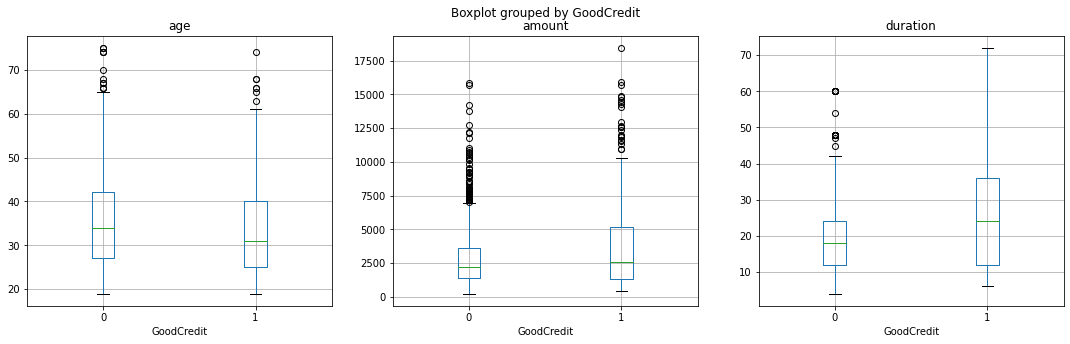

In [54]:
ContinuousColsList=['age','amount', 'duration']

fig, PlotCanvas=plt.subplots(nrows=1, ncols=len(ContinuousColsList), figsize=(18,5))

# Creating box plots for each continuous predictor against the Target Variable "GoodCredit"
for PredictorCol , i in zip(np.array(ContinuousColsList), range(len(ContinuousColsList))):
    df.boxplot(column=PredictorCol, by='GoodCredit', figsize=(5,5), vert=True, ax=PlotCanvas[i])

# Box-Plots interpretation: 
These plots gives an idea about the data distribution of continuous predictor in the Y-axis for each of the category in the X-Axis.

If the distribution looks similar for each category(Boxes are in the same line), that means the the continuous variable has NO effect on the target variable. Hence, the variables are not correlated to each other.

# Statistical Feature Selection using ANOVA test

In [55]:
# Defining a function to find the statistical relationship with all the categorical variables

def FunctionAnova(inpData, TargetVariable, ContinuousPredictorList):
    from scipy.stats import f_oneway

    # Creating an empty list of final selected predictors
    SelectedPredictors=[]
    
    print('ANOVA Test Results \n')
    for predictor in ContinuousPredictorList:
        CategoryGroupLists=inpData.groupby(TargetVariable)[predictor].apply(list)
        AnovaResults = f_oneway(*CategoryGroupLists)
        
      
        if (AnovaResults[1] < 0.05):
            print(predictor, 'is correlated with', TargetVariable, '| P-Value:', AnovaResults[1])
            SelectedPredictors.append(predictor)
        else:
            print(predictor, 'is NOT correlated with', TargetVariable, '| P-Value:', AnovaResults[1])
    
    return(SelectedPredictors)

In [56]:
# Calling the function to check which categorical variables are correlated with target
ContinuousVariables=['age', 'amount','duration']
FunctionAnova(inpData=df, TargetVariable='GoodCredit', ContinuousPredictorList=ContinuousVariables)

ANOVA Test Results 

age is correlated with GoodCredit | P-Value: 0.003925339398278295
amount is correlated with GoodCredit | P-Value: 8.797572373533373e-07
duration is correlated with GoodCredit | P-Value: 6.488049877187189e-12


['age', 'amount', 'duration']

All three columns are correlated with GoodCredit but the P-Value of "age", it is just at the boundry of the threshold.

# Relationship exploration: 
Grouped Bar Charts for Categorical Target Variable "GoodCredit" and Categorical predictors

In [57]:
CategoricalColsList=['checkingstatus', 'history', 'purpose','savings','employ',
                     'installment', 'status', 'others','residence', 'property',
                     'otherplans', 'housing', 'cards', 'job', 'liable', 'tele', 'foreign']

In [58]:
CrossTabResult=pd.crosstab(index=df['checkingstatus'], columns=df['GoodCredit'])
CrossTabResult

GoodCredit,0,1
checkingstatus,,
A11,139,135
A12,164,105
A13,49,14
A14,348,46


In [59]:
CrossTabResult1=pd.crosstab(index=df['history'], columns=df['GoodCredit'])
CrossTabResult1

GoodCredit,0,1
history,,
A30,15,25
A31,21,28
A32,361,169
A33,60,28
A34,243,50


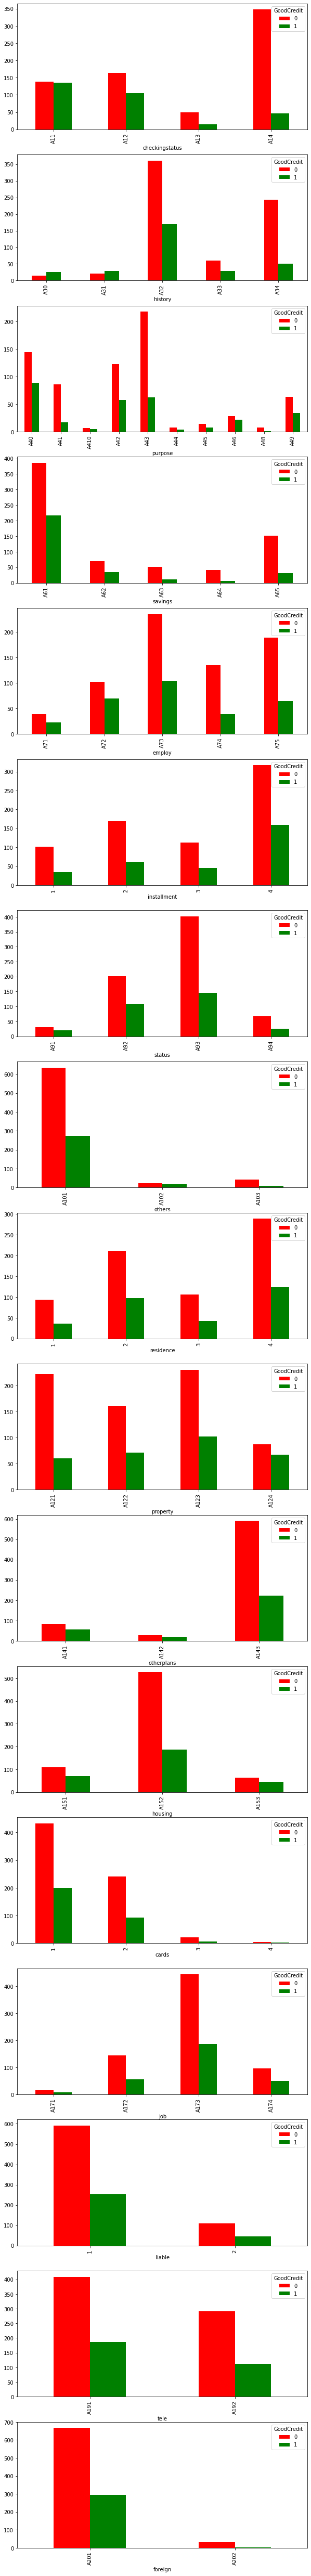

In [60]:
# Creating Grouped bar plots for each categorical predictor against the Target Variable "GoodCredit"

fig, PlotCanvas=plt.subplots(nrows=len(CategoricalColsList), ncols=1, figsize=(10,90))

for CategoricalCol , i in zip(CategoricalColsList, range(len(CategoricalColsList))):
    CrossTabResult=pd.crosstab(index=df[CategoricalCol], columns=df['GoodCredit'])
    CrossTabResult.plot.bar(color=['red','green'], ax=PlotCanvas[i])

# Grouped Bar charts Interpretation: 
These grouped bar charts show the frequency in the Y-Axis and the category in the X-Axis.

If the ratio of bars is similar across all categories, then the two columns are not correlated.

# Statistical Feature Selection using Chi-Square Test

Chi-Square test is conducted to check the correlation between two categorical variables

In [61]:
# Writing a function to find the correlation of all categorical variables with the Target variable

def FunctionChisq(inpData, TargetVariable, CategoricalVariablesList):
    from scipy.stats import chi2_contingency
    
    # Creating an empty list of final selected predictors
    SelectedPredictors=[]
    print('Chi Square Test Results \n')

    for predictor in CategoricalVariablesList:
        CrossTabResult=pd.crosstab(index=inpData[TargetVariable], columns=inpData[predictor])
        ChiSqResult = chi2_contingency(CrossTabResult)
        
        
        if (ChiSqResult[1] < 0.05):
            print(predictor, 'is correlated with', TargetVariable, '| P-Value:', ChiSqResult[1])
            SelectedPredictors.append(predictor)
        else:
            print(predictor, 'is NOT correlated with', TargetVariable, '| P-Value:', ChiSqResult[1])        
            
    return(SelectedPredictors) 

In [62]:
FunctionChisq(inpData=df, 
              TargetVariable='GoodCredit',
              CategoricalVariablesList= CategoricalColsList)

Chi Square Test Results 

checkingstatus is correlated with GoodCredit | P-Value: 1.2189020722893755e-26
history is correlated with GoodCredit | P-Value: 1.2791872956751013e-12
purpose is correlated with GoodCredit | P-Value: 0.00011574910079691586
savings is correlated with GoodCredit | P-Value: 2.7612142385682596e-07
employ is correlated with GoodCredit | P-Value: 0.0010454523491402541
installment is NOT correlated with GoodCredit | P-Value: 0.1400333122128481
status is correlated with GoodCredit | P-Value: 0.02223800546926877
others is correlated with GoodCredit | P-Value: 0.036055954027247226
residence is NOT correlated with GoodCredit | P-Value: 0.8615521320413175
property is correlated with GoodCredit | P-Value: 2.8584415733250017e-05
otherplans is correlated with GoodCredit | P-Value: 0.0016293178186473534
housing is correlated with GoodCredit | P-Value: 0.00011167465374597684
cards is NOT correlated with GoodCredit | P-Value: 0.4451440800083001
job is NOT correlated with GoodCr

['checkingstatus',
 'history',
 'purpose',
 'savings',
 'employ',
 'status',
 'others',
 'property',
 'otherplans',
 'housing',
 'foreign']

Based on the results of Chi-Square test, below categorical columns are selected as predictors for Machine Learning

'checkingstatus', 'history', 'purpose', 'savings', 'employ', 'status', 'others', 'property', 'otherplans', 'housing', 'foreign'

# Selecting final predictors for Machine Learning

In [63]:
#Based on all the above tests, selecting the final columns for machine learning

SelectedColumns=['checkingstatus','history','purpose','savings','employ',
 'status','others','property','otherplans','housing','foreign',
 'age', 'amount', 'duration']

# Selecting final columns
DataForML=df[SelectedColumns]
DataForML.head()

,checkingstatus,history,purpose,savings,employ,status,others,property,otherplans,housing,foreign,age,amount,duration
0,A11,A34,A43,A65,A75,A93,A101,A121,A143,A152,A201,67,1169,6
1,A12,A32,A43,A61,A73,A92,A101,A121,A143,A152,A201,22,5951,48
2,A14,A34,A46,A61,A74,A93,A101,A121,A143,A152,A201,49,2096,12
3,A11,A32,A42,A61,A74,A93,A103,A122,A143,A153,A201,45,7882,42
4,A11,A33,A40,A61,A73,A93,A101,A124,A143,A153,A201,53,4870,24


In [64]:
# Saving this final data for reference during deployment
DataForML.to_pickle('DataForML.pkl')

In [65]:
# Supressing the warning messages
import warnings
warnings.filterwarnings('ignore')

# Data Pre-processing for Machine Learning

##### 1. Converting Ordinal variables to numeric using business mapping

In [66]:
# Treating the Ordinal variable first
DataForML['employ'].replace({'A71':1, 'A72':2,'A73':3, 'A74':4,'A75':5 }, inplace=True)

In [67]:
##Converting the binary nominal variable to numeric using 1/0 mapping
# Treating the binary nominal variable

DataForML['foreign'].replace({'A201':1, 'A202':0}, inplace=True)

##### 2. Converting nominal variables to numeric using get_dummies()

In [68]:
# Treating all the nominal variables at once using dummy variables
DataForML_Numeric=pd.get_dummies(DataForML)

# Adding Target Variable to the data
DataForML_Numeric['GoodCredit']=df['GoodCredit']

In [69]:
## Looking at data after all the treatments
DataForML_Numeric.head()

,employ,foreign,age,amount,duration,checkingstatus_A11,checkingstatus_A12,checkingstatus_A13,checkingstatus_A14,history_A30,history_A31,history_A32,history_A33,history_A34,purpose_A40,purpose_A41,purpose_A410,purpose_A42,purpose_A43,purpose_A44,purpose_A45,purpose_A46,purpose_A48,purpose_A49,savings_A61,savings_A62,savings_A63,savings_A64,savings_A65,status_A91,status_A92,status_A93,status_A94,others_A101,others_A102,others_A103,property_A121,property_A122,property_A123,property_A124,otherplans_A141,otherplans_A142,otherplans_A143,housing_A151,housing_A152,housing_A153,GoodCredit
0,5,1,67,1169,6,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,1,0,0,0,0,0,1,0,1,0,0
1,3,1,22,5951,48,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,1,0,1
2,4,1,49,2096,12,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,1,0,1,0,0
3,4,1,45,7882,42,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,1,0
4,3,1,53,4870,24,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,1,0,0,1,1


In [70]:
# Printing all the column names for our reference
DataForML_Numeric.columns

Index(['employ', 'foreign', 'age', 'amount', 'duration', 'checkingstatus_A11',
       'checkingstatus_A12', 'checkingstatus_A13', 'checkingstatus_A14',
       'history_A30', 'history_A31', 'history_A32', 'history_A33',
       'history_A34', 'purpose_A40', 'purpose_A41', 'purpose_A410',
       'purpose_A42', 'purpose_A43', 'purpose_A44', 'purpose_A45',
       'purpose_A46', 'purpose_A48', 'purpose_A49', 'savings_A61',
       'savings_A62', 'savings_A63', 'savings_A64', 'savings_A65',
       'status_A91', 'status_A92', 'status_A93', 'status_A94', 'others_A101',
       'others_A102', 'others_A103', 'property_A121', 'property_A122',
       'property_A123', 'property_A124', 'otherplans_A141', 'otherplans_A142',
       'otherplans_A143', 'housing_A151', 'housing_A152', 'housing_A153',
       'GoodCredit'],
      dtype='object')

In [71]:
# Separate Target Variable and Predictor Variables
TargetVariable='GoodCredit'
Predictors=['employ', 'foreign', 'age', 'amount', 'duration', 'checkingstatus_A11','checkingstatus_A12', 'checkingstatus_A13', 'checkingstatus_A14','history_A30', 'history_A31', 'history_A32', 'history_A33',
            'history_A34', 'purpose_A40', 'purpose_A41', 'purpose_A410','purpose_A42', 'purpose_A43', 'purpose_A44', 'purpose_A45', 'purpose_A46', 'purpose_A48', 'purpose_A49', 'savings_A61',
       'savings_A62', 'savings_A63', 'savings_A64', 'savings_A65','status_A91', 'status_A92', 'status_A93', 'status_A94', 'others_A101','others_A102', 'others_A103', 'property_A121', 'property_A122',
       'property_A123', 'property_A124', 'otherplans_A141', 'otherplans_A142','otherplans_A143', 'housing_A151', 'housing_A152', 'housing_A153']

In [72]:
X=DataForML_Numeric[Predictors].values
y=DataForML_Numeric[TargetVariable].values

In [73]:
# Splitting the data into training and testing set

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=428)

# Normalization of data


In [74]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

PredictorScaler=MinMaxScaler()

# Storing the fit object for later reference
PredictorScalerFit=PredictorScaler.fit(X)

# Generating the standardized values of X
X=PredictorScalerFit.transform(X)

In [75]:
# Split the data into training and testing set

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [76]:
# Sanity check for the sampled data
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)


(700, 46)
(700,)
(300, 46)
(300,)


# **After all the treatments and splitting the final data into test and train we will now starting modelling diffrent classification models.**

# Classifier 1- Logistic Regression

In [77]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(C=1,penalty='l2', solver='newton-cg')
clf

LogisticRegression(C=1, solver='newton-cg')

In [78]:
# Creating the model on Training Data
LOG=clf.fit(X_train,y_train)
prediction=LOG.predict(X_test)

In [79]:
# Measuring accuracy on Testing Data
from sklearn import metrics
print(metrics.classification_report(y_test, prediction))
print(metrics.confusion_matrix(y_test, prediction))

# the Overall Accuracy of the model
F1_Score=metrics.f1_score(y_test, prediction, average='weighted')
print('Accuracy of the model on Testing Sample Data:', round(F1_Score,2))

              precision    recall  f1-score   support

           0       0.80      0.90      0.85       209
           1       0.68      0.47      0.56        91

    accuracy                           0.77       300
   macro avg       0.74      0.69      0.70       300
weighted avg       0.76      0.77      0.76       300

[[189  20]
 [ 48  43]]
Accuracy of the model on Testing Sample Data: 0.76


In [80]:
# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Running Cross validation

Accuracy_Values=cross_val_score(LOG, X , y, cv=10, scoring='f1_weighted')
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))


Accuracy values for 10-fold Cross Validation:
 [0.78666667 0.66403326 0.75159817 0.71776316 0.76028751 0.80460526
 0.63733333 0.77519841 0.77229833 0.7343254 ]

Final Average Accuracy of the model: 0.74


In [81]:
#Calculating roc_auc_score
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test ,prediction) 

0.6884168463115832

In [82]:
pred_proba = clf.predict_proba(X_test)

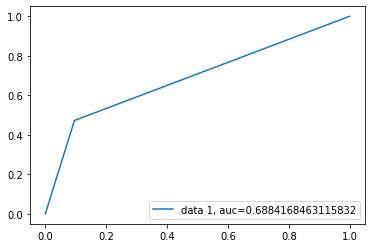

In [83]:
from sklearn.metrics import roc_curve

pred_proba = clf.predict_proba(X_test)[::,1]

fpr, tpr, _ = roc_curve(y_test,  prediction)

auc = roc_auc_score(y_test, prediction)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

For more exploration - we can use oversampling, undersampling, smote and adasym

# Classifier 2 - Decision Tree Classifier

In [84]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

In [85]:
clf = tree.DecisionTreeClassifier(max_depth=4,criterion='gini')


# Creating the model on Training Data
DTree=clf.fit(X_train,y_train)
prediction=DTree.predict(X_test)

In [86]:
# Measuring accuracy on Testing Data
from sklearn import metrics
print(metrics.classification_report(y_test, prediction))
print(metrics.confusion_matrix(y_test, prediction))

# Printing the Overall Accuracy of the model
F1_Score=metrics.f1_score(y_test, prediction, average='weighted')
print('Accuracy of the model on Testing Sample Data:', round(F1_Score,2))

              precision    recall  f1-score   support

           0       0.74      0.85      0.79       209
           1       0.48      0.33      0.39        91

    accuracy                           0.69       300
   macro avg       0.61      0.59      0.59       300
weighted avg       0.66      0.69      0.67       300

[[177  32]
 [ 61  30]]
Accuracy of the model on Testing Sample Data: 0.67


In [87]:
from sklearn import tree
from sklearn.model_selection import cross_val_score

# Running Cross validation
Accuracy_Values=cross_val_score(DTree, X , y, cv=10, scoring='f1_weighted')
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))


Accuracy values for 10-fold Cross Validation:
 [0.73734823 0.68       0.7343254  0.65257937 0.66798419 0.64715447
 0.70133333 0.72       0.71433083 0.70133333]

Final Average Accuracy of the model: 0.7


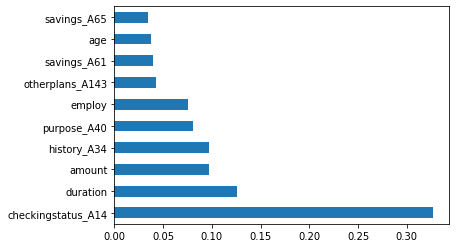

In [88]:
# Plotting the feature importance for Top 10 most important columns
%matplotlib inline
feature_importances = pd.Series(DTree.feature_importances_, index=Predictors)
feature_importances.nlargest(10).plot(kind='barh')

In [89]:
#Calculating roc_auc_score
from sklearn.metrics import roc_auc_score

roc_auc_score(y_test ,prediction) 

0.5882801409117199

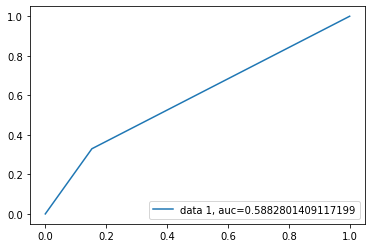

In [90]:
from sklearn.metrics import roc_curve

pred_proba = clf.predict_proba(X_test)[::,1]

fpr, tpr, _ = roc_curve(y_test,  prediction)

auc = roc_auc_score(y_test, prediction)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()


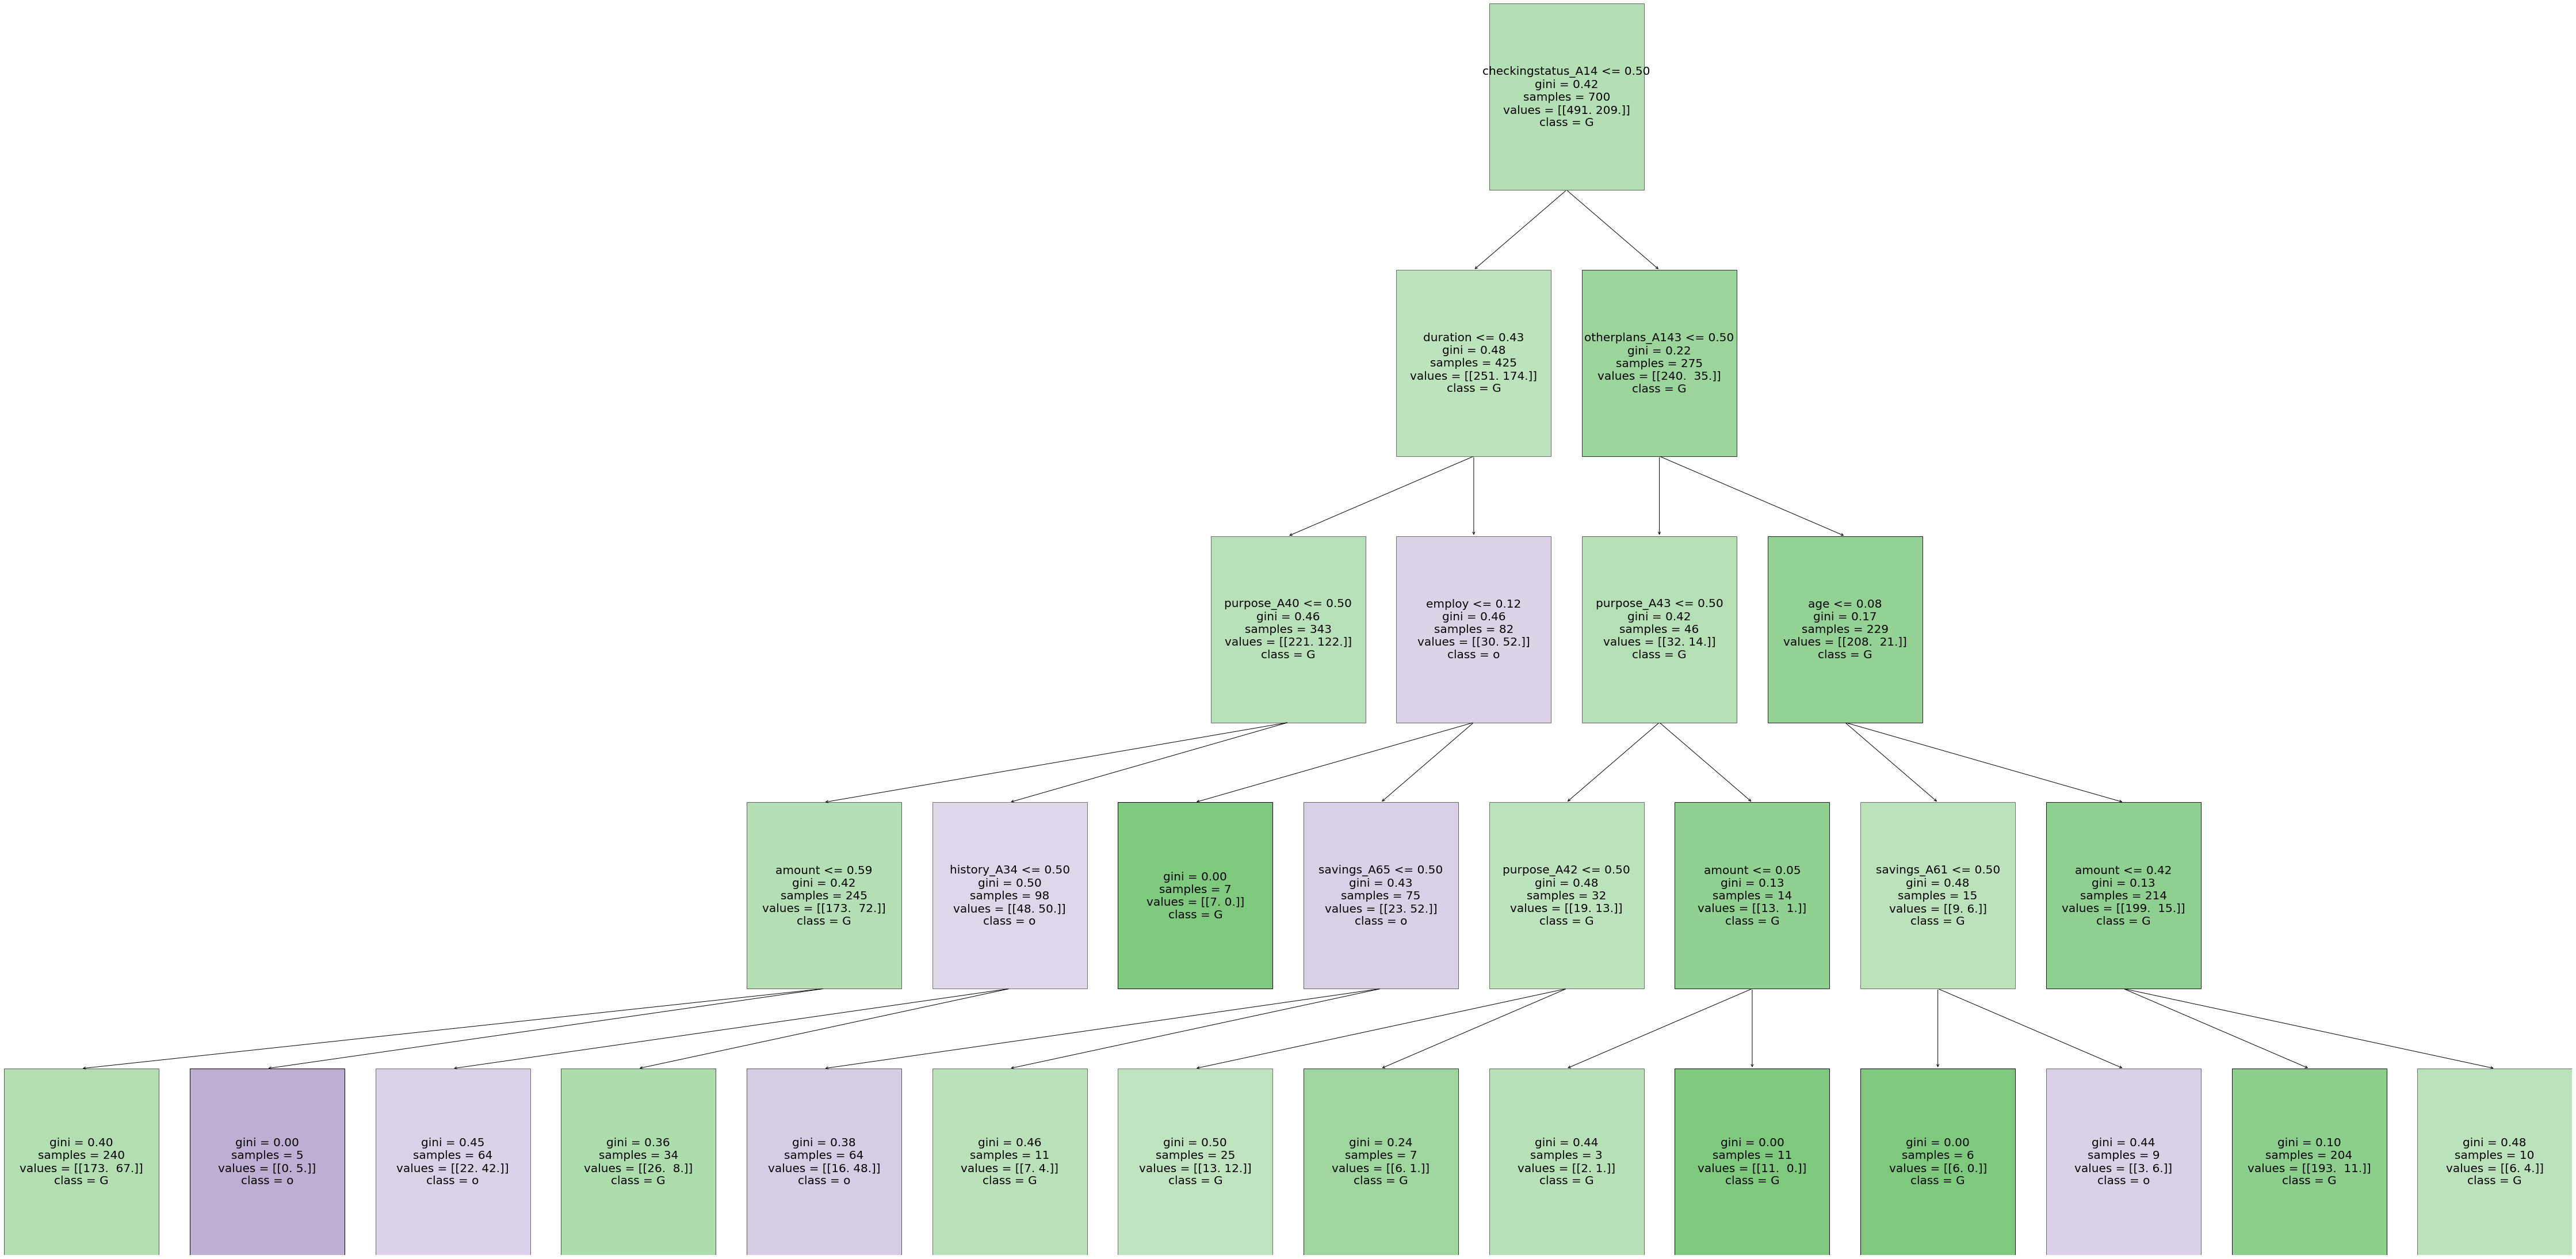

In [91]:
from dtreeplt import dtreeplt
dtree = dtreeplt(model=clf, feature_names=Predictors, target_names=TargetVariable)
fig = dtree.view()
currentFigure=plt.gcf()
currentFigure.set_size_inches(80,40)


# Classifier 3 - Random Forest

In [92]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(max_depth=10, n_estimators=100,criterion='gini')
clf

RandomForestClassifier(max_depth=10)

In [93]:
# Creating the model on Training Data
RF=clf.fit(X_train,y_train)
prediction=RF.predict(X_test)

# Measuring accuracy on Testing Data
from sklearn import metrics
print(metrics.classification_report(y_test, prediction))
print(metrics.confusion_matrix(y_test, prediction))

# Printing the Overall Accuracy of the model
F1_Score=metrics.f1_score(y_test, prediction, average='weighted')
print('Accuracy of the model on Testing Sample Data:', round(F1_Score,2))

              precision    recall  f1-score   support

           0       0.77      0.93      0.84       209
           1       0.68      0.35      0.46        91

    accuracy                           0.75       300
   macro avg       0.72      0.64      0.65       300
weighted avg       0.74      0.75      0.73       300

[[194  15]
 [ 59  32]]
Accuracy of the model on Testing Sample Data: 0.73


In [94]:
Accuracy_Values=cross_val_score(RF, X , y, cv=10, scoring='f1_weighted')
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))


Accuracy values for 10-fold Cross Validation:
 [0.81101871 0.67594937 0.73944295 0.74796273 0.75256116 0.715
 0.68221388 0.77389277 0.70606061 0.75665219]

Final Average Accuracy of the model: 0.74


In [95]:
roc_auc_score(y_test ,prediction) 

0.639939008360061

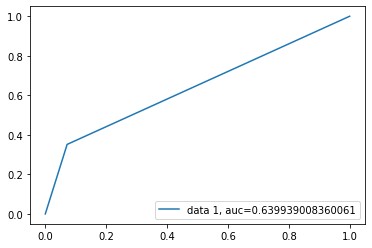

In [96]:
pred_proba = RF.predict_proba(X_test)[::,1]

fpr, tpr, _ = roc_curve(y_test,  prediction)

auc = roc_auc_score(y_test, prediction)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

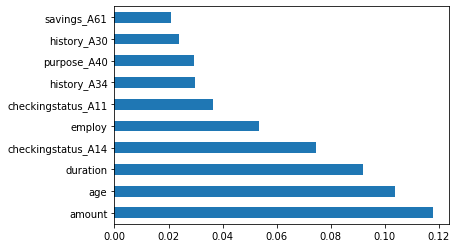

In [97]:
# Plotting the feature importance for Top 10 most important columns
%matplotlib inline
feature_importances = pd.Series(RF.feature_importances_, index=Predictors)
feature_importances.nlargest(10).plot(kind='barh')

# Classifier 4 - AdaBoost

In [98]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

DTC=DecisionTreeClassifier(max_depth=4)
clf = AdaBoostClassifier(n_estimators=200, base_estimator=DTC ,learning_rate=0.01)
clf

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=4),
                   learning_rate=0.01, n_estimators=200)

In [99]:
# Creating the model on Training Data
AB=clf.fit(X_train,y_train)
prediction=AB.predict(X_test)

# Measuring accuracy on Testing Data
from sklearn import metrics
print(metrics.classification_report(y_test, prediction))
print(metrics.confusion_matrix(y_test, prediction))

# Printing the Overall Accuracy of the model
F1_Score=metrics.f1_score(y_test, prediction, average='weighted')
print('Accuracy of the model on Testing Sample Data:', round(F1_Score,2))

              precision    recall  f1-score   support

           0       0.79      0.87      0.83       209
           1       0.61      0.46      0.53        91

    accuracy                           0.75       300
   macro avg       0.70      0.67      0.68       300
weighted avg       0.73      0.75      0.74       300

[[182  27]
 [ 49  42]]
Accuracy of the model on Testing Sample Data: 0.74


In [100]:
# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

Accuracy_Values=cross_val_score(AB, X , y, cv=10, scoring='f1_weighted')
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))


Accuracy values for 10-fold Cross Validation:
 [0.75256116 0.69605263 0.7343254  0.78289474 0.75665219 0.77781287
 0.67434211 0.73947368 0.76533333 0.76118421]

Final Average Accuracy of the model: 0.74


In [101]:
roc_auc_score(y_test ,prediction) 

0.6661759293338242

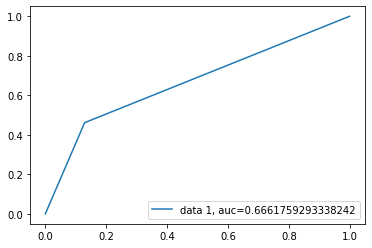

In [102]:
pred_proba = AB.predict_proba(X_test)

pred_proba = AB.predict_proba(X_test)[::,1]

fpr, tpr, _ = roc_curve(y_test,  prediction)

auc = roc_auc_score(y_test, prediction)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

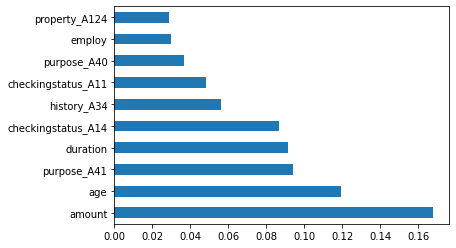

In [103]:
# Plotting the feature importance for Top 10 most important columns
%matplotlib inline
feature_importances = pd.Series(AB.feature_importances_, index=Predictors)
feature_importances.nlargest(10).plot(kind='barh')

# Classfier 5 - Xtreme Gradient Boosting (XGBoost)

In [104]:
from xgboost import XGBClassifier
clf=XGBClassifier(max_depth=10, learning_rate=0.01, n_estimators=200, objective='binary:logistic', booster='gbtree')
clf

XGBClassifier(learning_rate=0.01, max_depth=10, n_estimators=200)

In [105]:
# Creating the model on Training Data
XGB=clf.fit(X_train,y_train)
prediction=XGB.predict(X_test)

# Measuring accuracy on Testing Data
from sklearn import metrics
print(metrics.classification_report(y_test, prediction))
print(metrics.confusion_matrix(y_test, prediction))

# Printing the Overall Accuracy of the model
F1_Score=metrics.f1_score(y_test, prediction, average='weighted')
print('Accuracy of the model on Testing Sample Data:', round(F1_Score,2))

              precision    recall  f1-score   support

           0       0.77      0.89      0.82       209
           1       0.60      0.38      0.47        91

    accuracy                           0.74       300
   macro avg       0.69      0.64      0.65       300
weighted avg       0.72      0.74      0.72       300

[[186  23]
 [ 56  35]]
Accuracy of the model on Testing Sample Data: 0.72


In [106]:
# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation
Accuracy_Values=cross_val_score(XGB, X , y, cv=10, scoring='f1_weighted')
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))



Accuracy values for 10-fold Cross Validation:
 [0.78113208 0.67690925 0.7511499  0.70606061 0.71388889 0.79002079
 0.82520376 0.76028751 0.70602911 0.76028751]

Final Average Accuracy of the model: 0.75


In [107]:
roc_auc_score(y_test ,prediction) 

0.6372837688627162

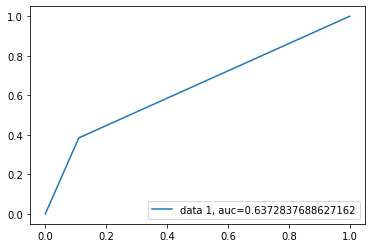

In [108]:
pred_proba = XGB.predict_proba(X_test)

pred_proba = XGB.predict_proba(X_test)[::,1]

fpr, tpr, _ = roc_curve(y_test,  prediction)

auc = roc_auc_score(y_test, prediction)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

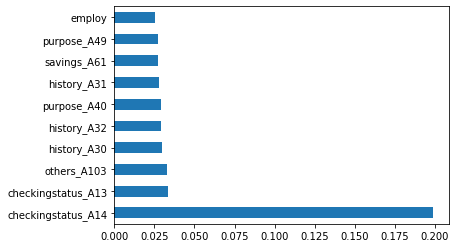

In [109]:
# Plotting the feature importance for Top 10 most important columns
%matplotlib inline
feature_importances = pd.Series(XGB.feature_importances_, index=Predictors)
feature_importances.nlargest(10).plot(kind='barh')

# Classifier 6 - K-Nearest Neighbor(KNN)

In [110]:
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=3)
clf

KNeighborsClassifier(n_neighbors=3)

In [111]:
# Creating the model on Training Data
KNN=clf.fit(X_train,y_train)
prediction=KNN.predict(X_test)

# Measuring accuracy on Testing Data
from sklearn import metrics
print(metrics.classification_report(y_test, prediction))
print(metrics.confusion_matrix(y_test, prediction))

# Printing the Overall Accuracy of the model
F1_Score=metrics.f1_score(y_test, prediction, average='weighted')
print('Accuracy of the model on Testing Sample Data:', round(F1_Score,2))

              precision    recall  f1-score   support

           0       0.79      0.87      0.83       209
           1       0.61      0.48      0.54        91

    accuracy                           0.75       300
   macro avg       0.70      0.67      0.68       300
weighted avg       0.74      0.75      0.74       300

[[181  28]
 [ 47  44]]
Accuracy of the model on Testing Sample Data: 0.74


In [112]:
# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

Accuracy_Values=cross_val_score(KNN, X , y, cv=10, scoring='f1_weighted')
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))


Accuracy values for 10-fold Cross Validation:
 [0.744      0.6508488  0.66649547 0.74604343 0.70541038 0.78289474
 0.65606469 0.67301587 0.66879756 0.7257269 ]

Final Average Accuracy of the model: 0.7


In [113]:
roc_auc_score(y_test ,prediction) 

0.6747725958252274

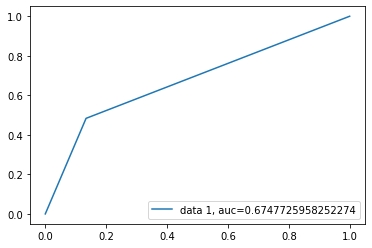

In [114]:
pred_proba = KNN.predict_proba(X_test)

from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

pred_proba = KNN.predict_proba(X_test)[::,1]

fpr, tpr, _ = roc_curve(y_test,  prediction)

auc = roc_auc_score(y_test, prediction)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

# Classifier7- Support Vector Machines(SVM)

In [115]:
from sklearn import svm
clf = svm.SVC(C=2, kernel='rbf', gamma=0.1)
clf

SVC(C=2, gamma=0.1)

In [116]:
# Creating the model on Training Data
SVM=clf.fit(X_train,y_train)
prediction=SVM.predict(X_test)

# Measuring accuracy on Testing Data
from sklearn import metrics
print(metrics.classification_report(y_test, prediction))
print(metrics.confusion_matrix(y_test, prediction))

# Printing the Overall Accuracy of the model
F1_Score=metrics.f1_score(y_test, prediction, average='weighted')
print('Accuracy of the model on Testing Sample Data:', round(F1_Score,2))

              precision    recall  f1-score   support

           0       0.78      0.89      0.83       209
           1       0.61      0.42      0.50        91

    accuracy                           0.74       300
   macro avg       0.70      0.65      0.66       300
weighted avg       0.73      0.74      0.73       300

[[185  24]
 [ 53  38]]
Accuracy of the model on Testing Sample Data: 0.73


In [117]:
# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

Accuracy_Values=cross_val_score(SVM, X , y, cv=10, scoring='f1_weighted')
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))


Accuracy values for 10-fold Cross Validation:
 [0.76987902 0.69775382 0.73089802 0.76533333 0.77229833 0.76118421
 0.70133333 0.80197664 0.79002079 0.74604343]

Final Average Accuracy of the model: 0.75


In [118]:
roc_auc_score(y_test ,prediction) 

0.651374940848625

# Classifier 8 - Naive Bayes

In [119]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB

clf = GaussianNB()
clf

GaussianNB()

In [120]:
NB=clf.fit(X_train,y_train)
prediction=NB.predict(X_test)

# Measuring accuracy on Testing Data
from sklearn import metrics
print(metrics.classification_report(y_test, prediction))
print(metrics.confusion_matrix(y_test, prediction))

# Printing the Overall Accuracy of the model
F1_Score=metrics.f1_score(y_test, prediction, average='weighted')
print('Accuracy of the model on Testing Sample Data:', round(F1_Score,2))

              precision    recall  f1-score   support

           0       0.85      0.72      0.78       209
           1       0.52      0.70      0.60        91

    accuracy                           0.71       300
   macro avg       0.68      0.71      0.69       300
weighted avg       0.75      0.71      0.72       300

[[150  59]
 [ 27  64]]
Accuracy of the model on Testing Sample Data: 0.72


In [121]:
# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score
Accuracy_Values=cross_val_score(NB, X , y, cv=10, scoring='f1_weighted')
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))


Accuracy values for 10-fold Cross Validation:
 [0.7109375  0.51596639 0.7        0.71895121 0.76397059 0.74599729
 0.65466893 0.74430147 0.74599729 0.73833389]

Final Average Accuracy of the model: 0.7


In [122]:
roc_auc_score(y_test ,prediction) 

0.7105000262894999

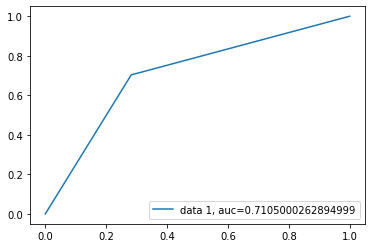

In [123]:
pred_proba = NB.predict_proba(X_test)

pred_proba = NB.predict_proba(X_test)[::,1]

fpr, tpr, _ = roc_curve(y_test,  prediction)

auc = roc_auc_score(y_test, prediction)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

# FINAL OUTPUT OF ALL THE MODELS

# 1.Logistic Regression
Accuracy of the model on Testing Sample Data: 0.76

Cross validation Average Accuracy of the model: 0.74

roc_auc_score: 0.69

# 2.Decision Tree Classifier
Accuracy of the model on Testing Sample Data: 0.67

Cross validation verage Accuracy of the model: 0.7

roc_auc_score: 0.59

# 3.RandomForestClassifier
Accuracy of the model on Testing Sample Data: 0.72

cross validation: 0.74

roc_auc_score: 0.63

# 4.AdaBoost
Accuracy of the model on Testing Sample Data: 0.73

Cross Validation Average Accuracy of the model: 0.74

roc_auc_score: 0.66

# 5.XGBoost
Accuracy of the model on Testing Sample Data: 0.72

Cross Validation Average Accuracy of the model: 0.75

roc_auc_score: 0.64

# 6.KNN
Accuracy of the model on Testing Sample Data: 0.74

Cross Validation Average Accuracy of the model: 0.7

roc_auc_score: 0.67

# 7.SVM
Accuracy of the model on Testing Sample Data: 0.73

Cross Validation Average Accuracy of the model: 0.75

roc_auc_score:0.65

# 8.Naive Bays
Accuracy of the model on Testing Sample Data: 0.72

Cross Validation Average Accuracy of the model: 0.7

roc_auc_score: 0.71

ALL THE MODELS HAVE NEARLY SAME ACCURACY ON TEST SAMPLE AS WELL AS AVERAGE CROSS VALIDATION IS ALSO SAME BUT IN MOST OF THE MODEL ROC_AUC_SCORE HAD A HUGE DIFFRENCE BETWEEN IT SELF AND ACCURACY OF MODEL

We can try more by Fixing the class Imbalance and apply some sampling techniques(OVERSAMPLING, UNDERSAMPLING,SMOTE,ADASYN) by this we MAY OR MAY NOT HAVE BETTER RESULTS

# Deployment of the Model
Based on the above trials we select that algorithm which produces the best average accuracy,Average cross validation accuracy, roc_auc_score and does not have much difference between all three . In this case, multiple algorithms have produced similar kind of average accuracy.

We will now use COBRA and combine all these different classification machines.

For deploying the model we will follow these steps:

Train the model using 100% data available

Save the model as a serialized file which can be stored anywhere

Create a python function which gets integrated with front-end(Tableau/Java Website etc.) to take all the inputs and returns the prediction

Choosing only the most important variables

Its beneficial to keep lesser number of predictors for the model while deploying it in production. The lesser predictors you keep, the better because, the model will be less dependent hence, more stable and it takes lesser time.

In this data, the most important predictor variables are 'employ', 'age', 'amount', 'duration','checkingstatus', 'history', 'purpose', 'savings', and 'status'. As these are consistently on top of the variable importance chart for every algorithm. Hence choosing these as final set of predictor variables.

In [124]:
# Separate Target Variable and Predictor Variables
TargetVariable='GoodCredit'

# Selecting the final set of predictors for the deployment
Predictors=['employ', 'age', 'amount', 'duration','checkingstatus_A11','checkingstatus_A12', 'checkingstatus_A13', 'checkingstatus_A14','history_A30', 'history_A31', 'history_A32', 'history_A33',
       'history_A34', 'purpose_A40', 'purpose_A41', 'purpose_A410','purpose_A42', 'purpose_A43', 'purpose_A44', 'purpose_A45','purpose_A46', 'purpose_A48', 'purpose_A49','savings_A61',
       'savings_A62', 'savings_A63', 'savings_A64', 'savings_A65', 'status_A91', 'status_A92', 'status_A93', 'status_A94']

In [125]:
X=DataForML_Numeric[Predictors].values
y=DataForML_Numeric[TargetVariable].values

In [126]:
### Normalization of data ###
from sklearn.preprocessing import MinMaxScaler

PredictorScaler=MinMaxScaler()

PredictorScalerFit=PredictorScaler.fit(X)

X=PredictorScalerFit.transform(X)

In [127]:
print(X.shape)
print(y.shape)

(1000, 32)
(1000,)


In [129]:
# Retraining the model using 100% data
# Using the COBRA algorithm with advanced set of machine lists (combining all the above machines).
import classifiercobra

clf = classifiercobra.ClassifierCobra(machine_list="advanced")
clf

ClassifierCobra(machine_list='advanced')

In [130]:
# Training the model on 100% Data available
Final_COBRA_Model = clf.fit(X, y)

In [131]:
# Cross validating the final model accuracy with less predictors
# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score
Accuracy_Values = cross_val_score(Final_COBRA_Model, X, y, cv=10, scoring="f1_weighted")
print("\nAccuracy values for 10-fold Cross Validation:\n", Accuracy_Values)
print("\nFinal Average Accuracy of the model:", round(Accuracy_Values.mean(), 4))


Accuracy values for 10-fold Cross Validation:
 [0.8153605  0.55799534 0.68853333 0.76870219 0.71563636 0.68637933
 0.68221388 0.56773919 0.69152783 0.66655197]

Final Average Accuracy of the model: 0.6841


In [132]:
#Save the model as a serialized file which can be stored anywhere
import pickle
import os

with open("Final_COBRA_Model.pkl", "wb") as fileWriteStream:
    pickle.dump(Final_COBRA_Model, fileWriteStream)

    fileWriteStream.close()

print("pickle file of Predictive Model is saved at Location:", os.getcwd())

pickle file of Predictive Model is saved at Location: /content


In [133]:
#Create a python function
# This Function can be called from any from any front end tool/website
import time
start = time.time()

def PredictLoanStatus(InputLoanDetails):
    import pandas as pd
    Num_Inputs=InputLoanDetails.shape[0]
    
    
    # Appending the new data with the Training data
    DataForML=pd.read_pickle('DataForML.pkl')
    InputLoanDetails=InputLoanDetails.append(DataForML)
    
    # Treating the Ordinal variable first
    InputLoanDetails['employ'].replace({'A71':1, 'A72':2,'A73':3, 'A74':4,'A75':5 }, inplace=True)
    
    # Generating dummy variables for rest of the nominal variables
    InputLoanDetails=pd.get_dummies(InputLoanDetails)
            
    # Maintaining the same order of columns as it was during the model training
    Predictors=['employ', 'age', 'amount', 'duration','checkingstatus_A11',
       'checkingstatus_A12', 'checkingstatus_A13', 'checkingstatus_A14',
       'history_A30', 'history_A31', 'history_A32', 'history_A33',
       'history_A34', 'purpose_A40', 'purpose_A41', 'purpose_A410',
       'purpose_A42', 'purpose_A43', 'purpose_A44', 'purpose_A45',
       'purpose_A46', 'purpose_A48', 'purpose_A49','savings_A61',
       'savings_A62', 'savings_A63', 'savings_A64', 'savings_A65',
       'status_A91', 'status_A92', 'status_A93', 'status_A94']
    
    # Generating the input values to the model
    X=InputLoanDetails[Predictors].values[0:Num_Inputs]
    
    # Generating the standardized values of X since it was done while model training also
    X=PredictorScalerFit.transform(X)
    
    # Loading the Function from pickle file
    import pickle
    with open('Final_COBRA_Model.pkl', 'rb') as fileReadStream:
        COBRA_model=pickle.load(fileReadStream)
        
        fileReadStream.close()
            
    # Genrating Predictions
    Prediction = COBRA_model.predict(X)
    PredictedStatus = pd.DataFrame(Prediction, columns=["Predicted Status"])
    return PredictedStatus


end = time.time()
print(end - start, "seconds")

0.00021505355834960938 seconds


In [134]:
# CHECKING OUR FUNCTION is working or not BY Calling the function for some loan applications manually
NewLoanApplications=pd.DataFrame(
    data=[['A73',22,5951,48,'A12','A32','A43','A61','A92'],
          ['A72',40,8951,24,'A12','A32','A43','A61','A92']],
    
    columns=['employ', 'age', 'amount', 'duration','checkingstatus', 'history', 'purpose', 'savings','status'])

print(NewLoanApplications)

# Calling the Function for prediction
PredictLoanStatus(InputLoanDetails= NewLoanApplications)

  employ  age  amount  duration checkingstatus history purpose savings status
0    A73   22    5951        48            A12     A32     A43     A61    A92
1    A72   40    8951        24            A12     A32     A43     A61    A92


,Predicted Status
0,1.0
1,1.0


# Deploying a predictive model as an API

In [135]:
# Creating the function which can take loan inputs and perform prediction
def FunctionLoanPrediction(inp_employ, inp_age , inp_amount, inp_duration,
                           inp_checkingstatus,inp_history, inp_purpose, 
                           inp_savings, inp_status):
    SampleInputData=pd.DataFrame(
     data=[[inp_employ, inp_age , inp_amount, inp_duration,
           inp_checkingstatus,inp_history, inp_purpose, inp_savings, inp_status]],
     columns=['employ', 'age', 'amount', 'duration','checkingstatus', 
         'history', 'purpose', 'savings','status'])

    # Calling the function defined above using the input parameters
    Predictions=PredictLoanStatus(InputLoanDetails= SampleInputData)

    # Returning the predicted loan status
    return(Predictions.to_json())

In [136]:
# Function call
FunctionLoanPrediction(inp_employ='A73',  inp_age= 22,  inp_amount=5951, inp_duration=48, inp_checkingstatus='A12', inp_history='A32', inp_purpose='A43', inp_savings='A61', inp_status='A92')

'{"Predicted Status":{"0":1.0}}'